# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing datasets

In [2]:
path = r'C:\Users\Aricia\MM-2020 Instacart Basket Analysis'

In [3]:
# Importing Orders Products Merge 4.8 version
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge48.pkl'))

# Bar charts

<Axes: xlabel='orders_day_of_week'>

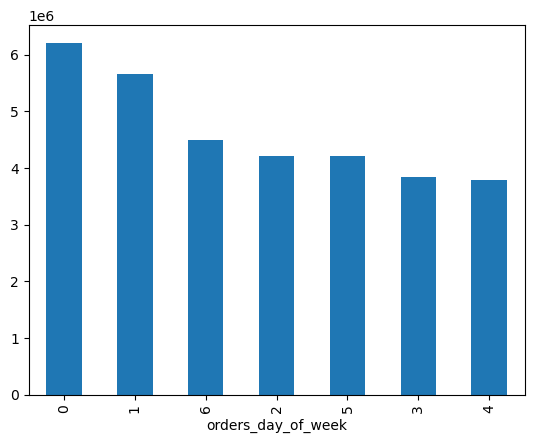

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

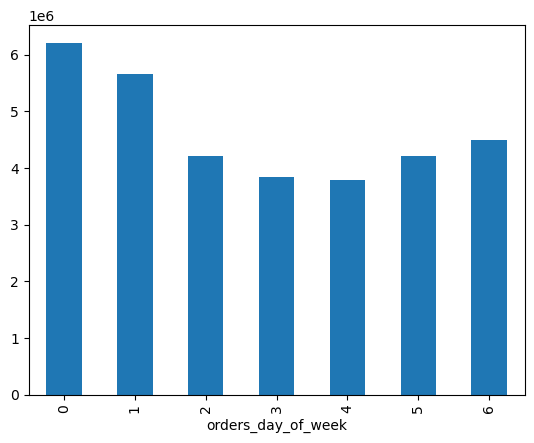

In [5]:
# Use sort_index to sort bars according to their index order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Printing frequencies (use index as above to sort order by index)
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

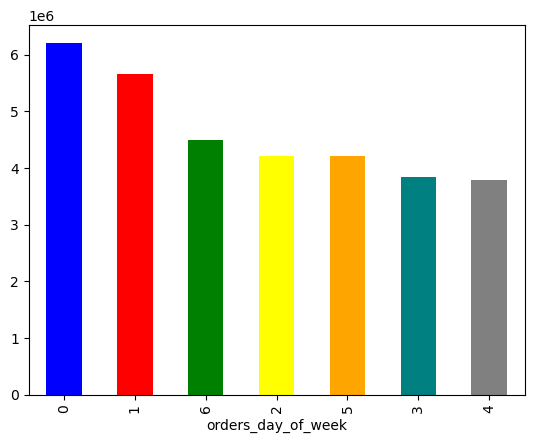

In [11]:
# Adding colors to graphic - name it by order
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['blue', 'red', 'green', 'yellow', 'orange', 'teal','grey'])

# Exporting charts

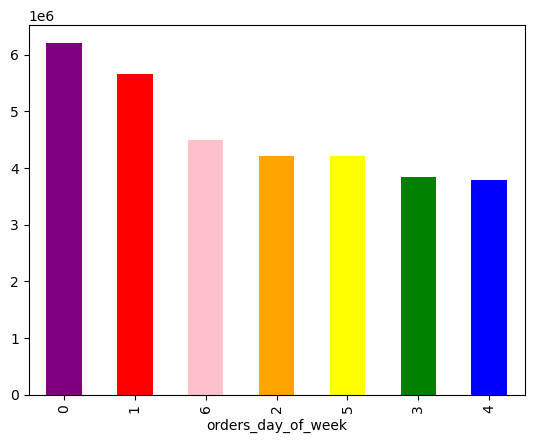

In [30]:
# Saving in the notebook
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [ ]:
# Saving outside of Jupyter as an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms and Scatterplots

<Axes: ylabel='Frequency'>

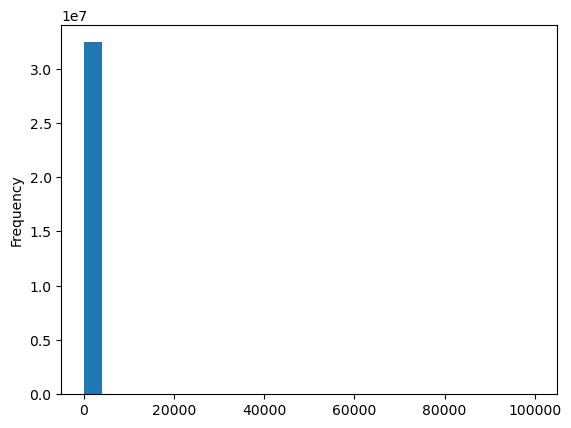

In [12]:
# Histograms of prices
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

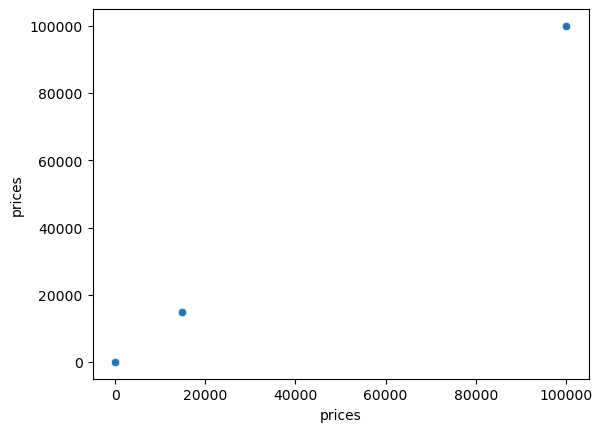

In [14]:
# Scatterplot of prices
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [15]:
# Checking outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

C:\Users\Aricia\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\Aricia\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender_type,order_frequency,order_frequency_flag
13128379,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regular days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13128380,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regular days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13128381,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regular days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13128382,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13128383,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815123,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21815124,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Average orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
21815125,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [16]:
# Turn outliers into NaNs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [17]:
# Checking replacement by running a max function
ords_prods_merge['prices'].max()

25.0

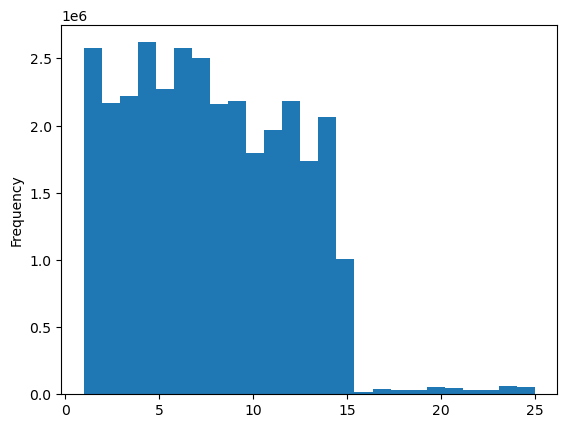

In [19]:
# Retrying histogram after cleaning data (increase number of bins from 25 to70 for more granular graaphic)
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

## Sampling data

In [24]:
# Length of random numbers
len(ords_prods_merge)

32434212

In [20]:
# Random sample with 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [22]:
# Checking boolean on the new list
dev

array([False,  True, False, ..., False,  True,  True])

In [25]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [26]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [27]:
# Checking accuracy
len(big) + len(small)

32434212

In [28]:
# Reducing sample to necessary columns
df_2 = small[['orders_day_of_week','prices']]

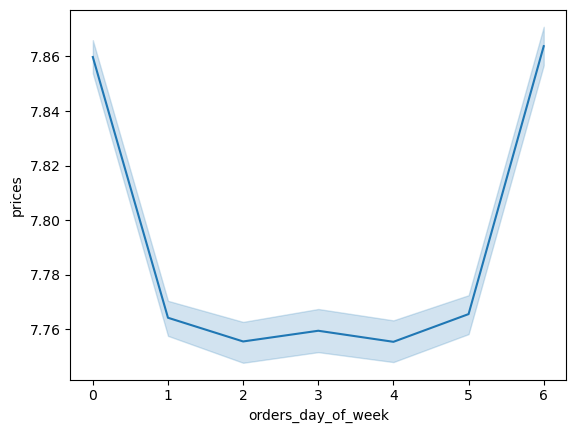

In [29]:
# Create a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')